# Funciones de distribución de probabilidad

## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

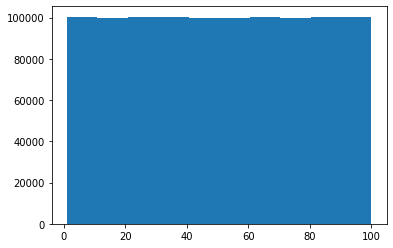

In [3]:
plt.hist(data)
plt.show()

## Distribucion normal

In [4]:
data = np.random.randn(1000000)

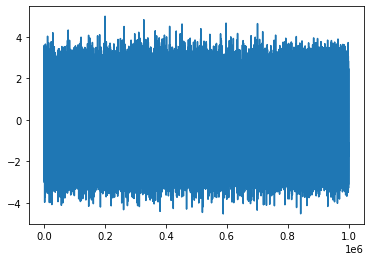

In [5]:
x = range(1, 1000001)
plt.plot(x, data)
plt.show()

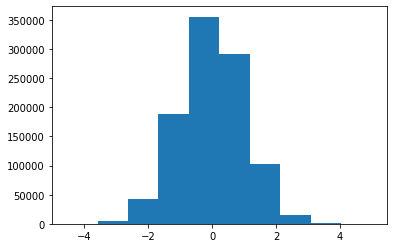

In [6]:
# En este caso la media queda centrada en 0 y la desviación típica en +-1
plt.hist(data)
plt.show()

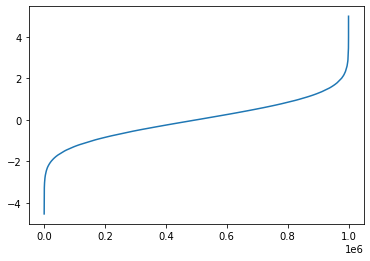

In [7]:
plt.plot(x, sorted(data)) # Funcion de distribucion acumulada
plt.show()

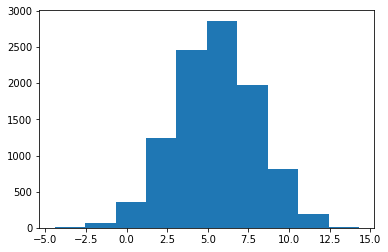

In [8]:
# Se puede modificar el valor de la media y desviacion típica en datos aleatorios de la siguiente forma
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0, 1), X = mu + sd * Z
plt.hist(data)
plt.show()

In [9]:
# Dos muestras aleatorias de tamaño 4 y cada una de ellas conforman una campana de Gauss
data = np.random.randn(2, 4)
data

array([[ 0.56228336,  0.34434162, -0.0789419 , -0.78416396],
       [ 0.96137651,  0.04930206,  0.48749798, -2.46037588]])

## La simulación de Montecarlo

* Generar dos números aleatorios uniformes $x$ e $y$ entre 0 y 1 en total 1000 veces.
* Calcular $x^2$ + $y^2$.
    * Si el valor es inferior a 1 $\rightarrow$ estamos dentro del círculo.
    * Si el valor es superior a 1 $\rightarrow$ estamos fuera del círculo.
* Calculamos el numero total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximacion de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de $\pi$.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de $\pi$.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de $\pi$.

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]**2 + y[j]**2)
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg/n_exp
    fig = plt.plot(pi_value_list)
    return pi, fig

(3.143864000000001, [<matplotlib.lines.Line2D at 0x1be2c96cdf0>])

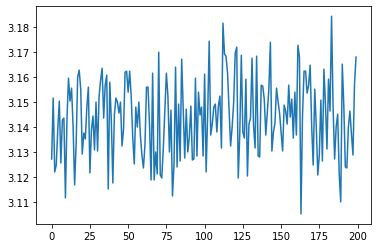

In [11]:
pi_montecarlo(n = 10000, n_exp = 200)

## Dummy Datasets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000757,1.501355,18.497602
std,1.001429,2.502318,7.794763
min,-4.785894,-10.951513,5.000014
25%,-0.676576,-0.187615,11.742910
50%,0.000164,1.505889,18.496297
75%,0.674389,3.190459,25.238892
max,4.752406,14.772031,31.999997


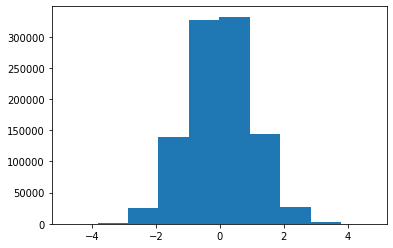

In [14]:
plt.hist(data['A'])
plt.show()

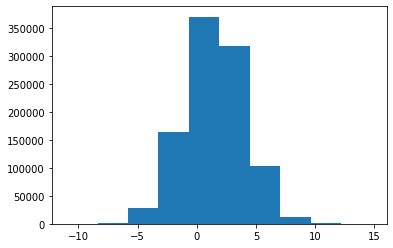

In [15]:
plt.hist(data['B'])
plt.show()

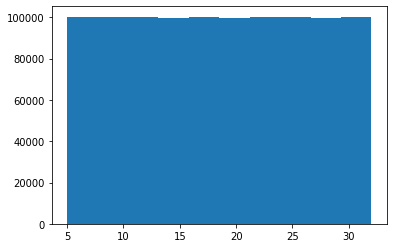

In [16]:
plt.hist(data['C'])
plt.show()

In [17]:
mainpath = '../../datasets/'
filename = 'customer-churn-model/Customer Churn Model.txt'
fullpath = os.path.join(mainpath, filename)

In [18]:
data = pd.read_csv(fullpath)

In [19]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
column_names = data.columns.values.tolist()

In [21]:
a = len(column_names)
a

21

In [22]:
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0, 1, a)
    }, index = range(42, 42 + a) # Para cambiar la generacion del dataset en otro índice
)

In [23]:
new_data

,Column Name,A,B
42,State,-0.339750,0.385637
43,Account Length,0.569147,0.446893
44,Area Code,-1.759766,0.773262
45,Phone,0.625317,0.856993
46,Int'l Plan,0.205922,0.629356
47,VMail Plan,0.392461,0.353936
48,VMail Message,-0.640106,0.321131
49,Day Mins,0.639164,0.764909
50,Day Calls,1.481694,0.299444
51,Day Charge,-1.177343,0.948367
